<a href="https://colab.research.google.com/github/Smai345/ML_OPTIONAL/blob/main/Kernel%20Trick%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

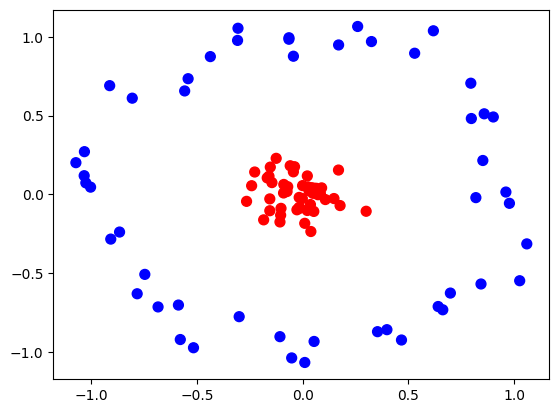

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-8-3603277588>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


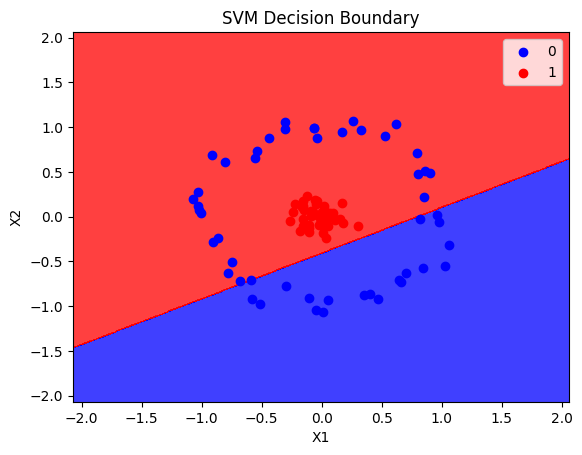

In [9]:
plot_decision_boundary(X, y, classifier)

In [10]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

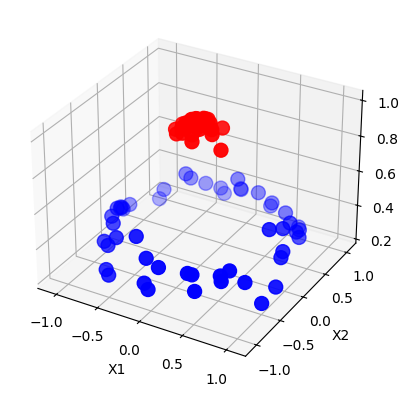

In [11]:
plot_3d_plot(X,y)

In [12]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-8-3603277588>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


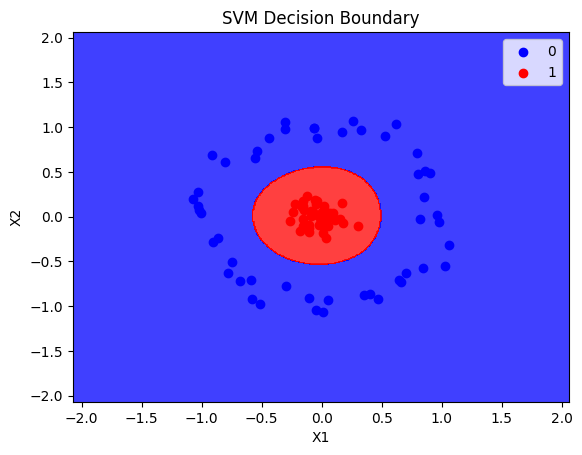

In [14]:
plot_decision_boundary(X, y, rbf_classifier)

In [15]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-8-3603277588>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


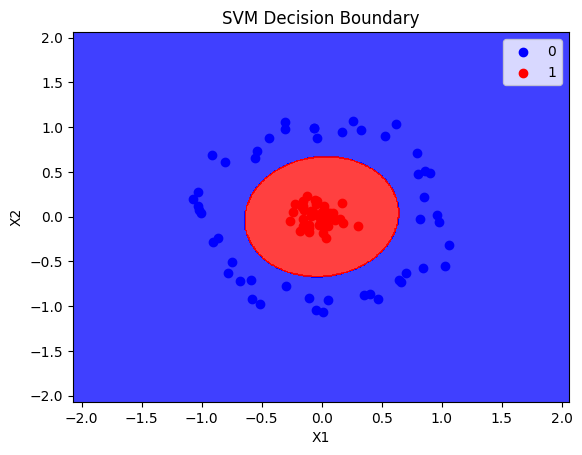

In [17]:
plot_decision_boundary(X, y, poly_classifier)

In [18]:
X

array([[ 3.25650058e-01,  9.70513879e-01],
       [-8.99447242e-02,  8.60178741e-03],
       [ 6.48880125e-02,  3.83230946e-02],
       [ 3.54297286e-01, -8.72630220e-01],
       [-3.07412558e-01,  9.77921719e-01],
       [-3.05405591e-01,  1.05507656e+00],
       [ 5.29857658e-01,  8.96368416e-01],
       [ 1.06008503e+00, -3.14858487e-01],
       [ 5.43624468e-02, -9.34762214e-01],
       [-1.00234559e+00,  4.55899657e-02],
       [-8.65355829e-01, -2.39592740e-01],
       [ 5.30044771e-02, -1.08705795e-01],
       [-5.78165119e-01, -9.22558470e-01],
       [-7.02405351e-02,  4.83058818e-02],
       [-3.81055780e-02,  1.75388429e-01],
       [-1.03140102e+00,  2.70995001e-01],
       [ 9.00063716e-02,  4.09567796e-02],
       [-1.02644631e-05,  5.53365517e-02],
       [ 7.95433057e-01,  7.05899530e-01],
       [ 6.40992411e-01, -7.12794164e-01],
       [-4.33397483e-02,  8.77345071e-01],
       [ 5.47260570e-02,  3.84270253e-02],
       [-7.82034322e-01, -6.31741882e-01],
       [-9.

In [19]:
np.exp(-(X**2)).sum(1)

array([1.28926896, 1.99186859, 1.99433082, 1.34900549, 1.29412582,
       1.23945565, 1.20298742, 1.23066835, 1.41441982, 1.36407939,
       1.41712637, 1.98544706, 1.14279596, 1.99274768, 1.96825623,
       1.27433938, 1.99025553, 1.99694255, 1.13871464, 1.26472462,
       1.4612595 , 1.99553399, 1.21341939, 1.05609324, 1.96159007,
       1.93358977, 1.43858125, 1.97369939, 1.15320268, 1.94418976,
       1.36766789, 1.9302606 , 1.24816951, 1.38102382, 1.997133  ,
       1.31930073, 1.31821086, 1.97191628, 1.96398017, 1.0884815 ,
       1.34462393, 1.33681401, 1.46054018, 1.99441772, 1.02198695,
       1.32215092, 1.25516781, 1.99927731, 1.97752096, 1.99479006,
       1.22635247, 1.94807393, 1.21142024, 1.99431132, 1.99732333,
       1.94751122, 1.99408679, 1.22831011, 1.96654858, 1.98903187,
       1.99935257, 1.27743062, 1.98738237, 1.34537824, 1.36161587,
       1.37779193, 1.95827239, 1.98967856, 1.99278964, 1.33036354,
       1.29190949, 1.96194612, 1.96415859, 1.96547869, 1.99638

In [20]:
X_new=np.exp(-(X**2))

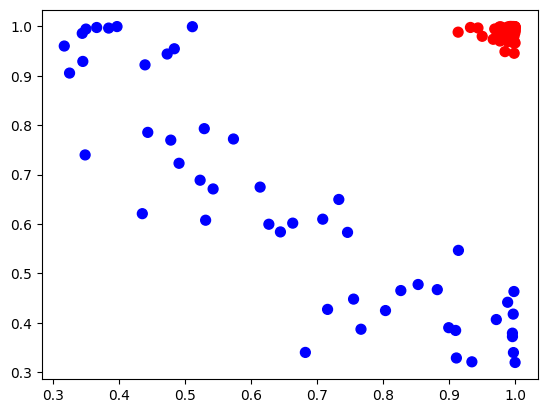

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')